In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Understanding the dataset

In [3]:
print(df.head(), end = '\n')

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [4]:
print(df.shape, end='\n')

(51717, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning

#### Drop Unnecessary Columns

We have 17 columns, but we'll only keep the important ones: 'name', 'online order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in (type)', and 'listed_in (city)'. The rest will be removed.

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.drop(columns=['url', 'address', 'phone', 'location', 'reviews_list', 'menu_item','dish_liked'],axis=1,inplace=True)

### Rename Columns
The columns are renamed with clearer names to make them easier to understand.

In [8]:
df=df.rename(columns={'name':'Name', 'online_order':'Online_Order', 'book_table':'Book_Table', 'rate':'Ratings', 'votes':'Votes', 'rest_type':'Rest_Type',
       'cuisines':'Cuisines', 'approx_cost(for two people)':'Cost_for_2',
       'listed_in(type)':'Type', 'listed_in(city)':'Location'})

In [9]:
df.columns

Index(['Name', 'Online_Order', 'Book_Table', 'Ratings', 'Votes', 'Rest_Type',
       'Cuisines', 'Cost_for_2', 'Type', 'Location'],
      dtype='object')

In [10]:
df.sample(5)

,Name,Online_Order,Book_Table,Ratings,Votes,Rest_Type,Cuisines,Cost_for_2,Type,Location
10840,Hunger2Eat,Yes,No,3.7/5,26,Quick Bites,"Biryani, Fast Food, North Indian",400,Dine-out,BTM
42485,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,Yes,No,3.9 /5,87,Cafe,"Cafe, Fast Food, Chinese",450,Delivery,MG Road
11835,Kanti Sweets,Yes,No,3.6/5,20,"Dessert Parlor, Quick Bites","Mithai, Street Food",400,Delivery,Church Street
7764,Sherlock's Pub,Yes,Yes,3.5/5,261,"Pub, Casual Dining","Continental, North Indian, Chinese","1,500",Dine-out,Brookefield
48526,Donne Biryani,No,No,3.2 /5,11,Quick Bites,Biryani,200,Dine-out,Residency Road


In [11]:
sum(df.duplicated())

124

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(51593, 10)

In [14]:
# remove redundant data from the ‘Name
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text) 

df['Name'] = df['Name'].apply(lambda x: name_clean(x))

In [15]:
df['Name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: Name, Length: 51593, dtype: object

#### "Ratings" Column

In [16]:
df['Ratings'].value_counts()

Ratings
NEW       2194
3.9/5     2095
3.8/5     2020
3.7/5     2009
3.9 /5    1872
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [17]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

The dataset contains 'nan,' 'NEW,' and '-' values with no ratings, and the ratings are in string format like '/5'. We need to clean this data by removing irrelevant entries and converting the ratings into numeric form.

In [18]:
#### removing 'nan', 'NEW', '-' values

In [72]:
def cleaned_ratings(val):
    if(val=='NEW' or val=='-' or val=='nan'):
        return np.nan
    else:
        return float(str(val).split('/')[0])

df['Ratings']=df['Ratings'].apply(cleaned_ratings)

# Converting to float type data
df['Ratings']=df['Ratings'].astype(float)

In [73]:
df['Ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [74]:
df['Ratings'].dtypes

dtype('float64')

In [75]:
# Categorizing the "Ratings" column

In [76]:
pd.cut(df['Ratings'], ordered=True, bins=3, precision=1)
df['Rate_Category']=pd.cut(df['Ratings'], ordered=True, bins=3,precision=1)

df['Rate_Category']

0        (3.9, 4.9]
1        (3.9, 4.9]
2        (2.8, 3.9]
3        (2.8, 3.9]
4        (2.8, 3.9]
            ...    
51709    (2.8, 3.9]
51711    (1.8, 2.8]
51712    (2.8, 3.9]
51715    (3.9, 4.9]
51716    (2.8, 3.9]
Name: Rate_Category, Length: 41198, dtype: category
Categories (3, interval[float64, right]): [(1.8, 2.8] < (2.8, 3.9] < (3.9, 4.9]]

In [77]:
df['Rate_Category'].cat.rename_categories(['low','medium','high'])
df['Rate_Category']=df['Rate_Category'].cat.rename_categories(['low','medium','high'])

In [78]:
df.head()

,Name,Online_Order,Book_Table,Ratings,Votes,Rest_Type,Cuisines,Cost_for_2,Type,Location,Rate_Category
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"north indian, mughlai, chinese",800.0,Buffet,Banashankari,high
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"chinese, north indian, thai",800.0,Buffet,Banashankari,high
2,San Churro Cafe,Yes,No,3.8,918,Others,"cafe, mexican, italian",800.0,Buffet,Banashankari,medium
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"south indian, north indian",300.0,Buffet,Banashankari,medium
4,Grand Village,No,No,3.8,166,Casual Dining,"north indian, rajasthani",600.0,Buffet,Banashankari,medium


### "Cost_for_2" column

In [79]:
df['Cost_for_2'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

The 'cost' attribute contains string values with commas. To work with them as numbers, we can remove the commas and convert the strings into numeric values.

In [80]:
## function to remove commas(,) and convert the values into numbers
def cost(value):
    value=str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)

df['Cost_for_2'] = df['Cost_for_2'].apply(cost)
print(df['Cost_for_2'].unique())

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199. 1100.
 1600.  230.  130. 1700. 1350. 2200. 1400. 2000. 1800. 1900.  180.  330.
 2500. 2100. 3000. 2800. 3400.   50.   40. 1250. 3500. 4000. 2400. 2600.
 1450.   70. 3200.  240. 6000. 1050. 2300. 4100.  120. 5000. 3700. 1650.
 2700. 4500.   80.]


In [81]:
# Rest_Type:

In [82]:
print(df['Rest_Type'].value_counts())
rest_type_less = pd.DataFrame(df['Rest_Type'].value_counts())
rest_type_less[rest_type_less['count']<1000]
rest_type_less = rest_type_less[rest_type_less['count'] < 1000]

Rest_Type
Quick Bites           13861
Casual Dining          9599
Others                 7788
Cafe                   3365
Dessert Parlor         1848
Delivery               1670
Takeaway, Delivery     1276
Casual Dining, Bar     1087
Bakery                  704
Name: count, dtype: int64


In [83]:
display(rest_type_less)

,count
Rest_Type,
Bakery,704


* There are too many categories of rest type
* Data is not clean has many values which are comma separated.
* Best thing to clean this will be to combine rest_types which are less frequent to other category

In [84]:
def combine_vals(val):
    if (val in rest_type_less.index):
        return 'Others'
    else:
        return val
df['Rest_Type']=df['Rest_Type'].apply(combine_vals)
df['Rest_Type']

0             Casual Dining
1             Casual Dining
2                    Others
3               Quick Bites
4             Casual Dining
                ...        
51709    Casual Dining, Bar
51711    Casual Dining, Bar
51712                Others
51715                Others
51716                Others
Name: Rest_Type, Length: 41198, dtype: object

In [85]:
### Harmonizing the "Cuisins" column

In [86]:
df['Cuisines'] = df['Cuisines'].astype(str).str.lower().str.replace(r"[\[\]']", '', regex=True)

In [87]:
df['Cuisines']

0                     north indian, mughlai, chinese
1                        chinese, north indian, thai
2                             cafe, mexican, italian
3                         south indian, north indian
4                           north indian, rajasthani
                            ...                     
51709                      north indian, continental
51711    andhra, south indian, chinese, north indian
51712                                    continental
51715                                    finger food
51716         finger food, north indian, continental
Name: Cuisines, Length: 41198, dtype: object

In [88]:
### Handling Missing Values

In [89]:
df.isnull().sum()

Name             0
Online_Order     0
Book_Table       0
Ratings          0
Votes            0
Rest_Type        0
Cuisines         0
Cost_for_2       0
Type             0
Location         0
Rate_Category    0
dtype: int64

In [90]:
print([features for features in df.columns if df[features].isnull().sum()>0])

[]


<Axes: >

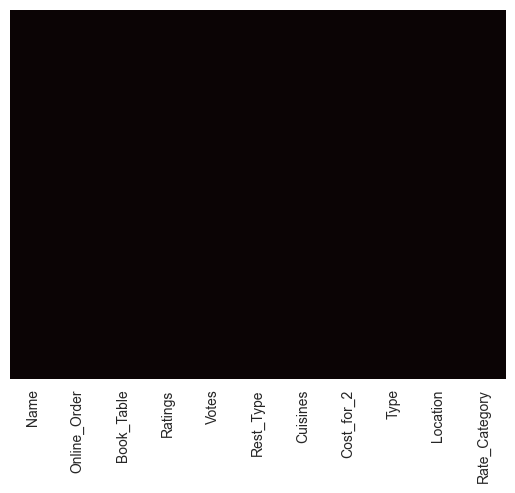

In [91]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')

In [92]:
df=df.dropna()

In [93]:
df.shape

(41198, 11)

In [94]:
df.isnull().sum()

Name             0
Online_Order     0
Book_Table       0
Ratings          0
Votes            0
Rest_Type        0
Cuisines         0
Cost_for_2       0
Type             0
Location         0
Rate_Category    0
dtype: int64

Now that we have cleaned our data, it is ready for analysis.

In [95]:
df.Ratings

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: Ratings, Length: 41198, dtype: float64

In [96]:
df.Rate_Category

0          high
1          high
2        medium
3        medium
4        medium
          ...  
51709    medium
51711       low
51712    medium
51715      high
51716    medium
Name: Rate_Category, Length: 41198, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [97]:
#SAve Cleaned Data
df.to_csv('cleaned_zomato.csv', index=False)

In [98]:
df_cleaned = pd.read_csv('cleaned_zomato.csv')
df_cleaned.head()

,Name,Online_Order,Book_Table,Ratings,Votes,Rest_Type,Cuisines,Cost_for_2,Type,Location,Rate_Category
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"north indian, mughlai, chinese",800.0,Buffet,Banashankari,high
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"chinese, north indian, thai",800.0,Buffet,Banashankari,high
2,San Churro Cafe,Yes,No,3.8,918,Others,"cafe, mexican, italian",800.0,Buffet,Banashankari,medium
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"south indian, north indian",300.0,Buffet,Banashankari,medium
4,Grand Village,No,No,3.8,166,Casual Dining,"north indian, rajasthani",600.0,Buffet,Banashankari,medium


In [99]:
### SQL Integration

In [100]:
# !pip install mysql-connector-python
# !pip install pymysql

In [101]:
from sqlalchemy import create_engine

username = 'root'
password = 'MySQL'
host = 'localhost'
database = 'zomatoRes'  

# Create an engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# Test connection
connection = engine.connect()
print("Connected successfully!")
connection.close()

Connected successfully!


In [102]:
df_cleaned.to_sql(name="cleaned_zomato", con=engine, if_exists="replace", index=False)

41198

### Exploratory Data Analysis:

In [103]:
df_cleaned = pd.read_csv('cleaned_zomato.csv')

1. How many restaurants in Bangalore take online orders?

Online_Order
Yes    27054
No     14144
Name: count, dtype: int64


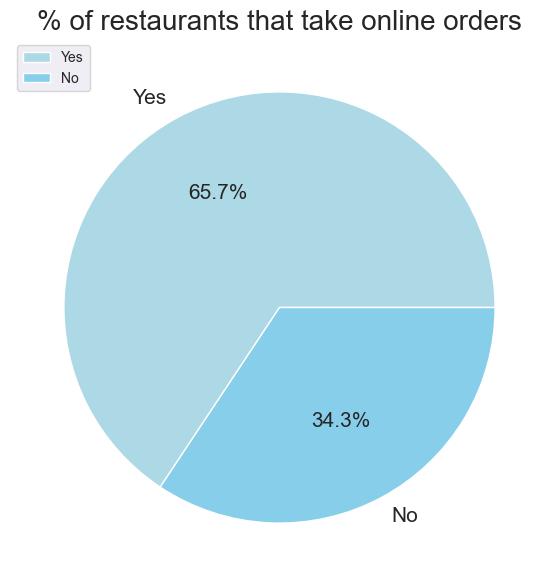

In [104]:
print(df_cleaned['Online_Order'].value_counts())
plt.figure(figsize=(15,7))
df_cleaned['Online_Order'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

2. What percentage of restaurants offer table booking facilities?

Book_Table
No     34923
Yes     6275
Name: count, dtype: int64


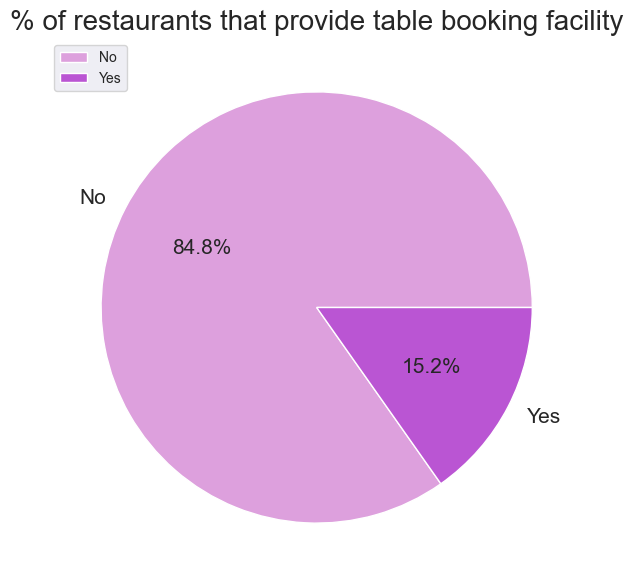

In [105]:
print(df_cleaned['Book_Table'].value_counts())
plt.figure(figsize=(15,7))
df_cleaned['Book_Table'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

3. What was the most common rating?

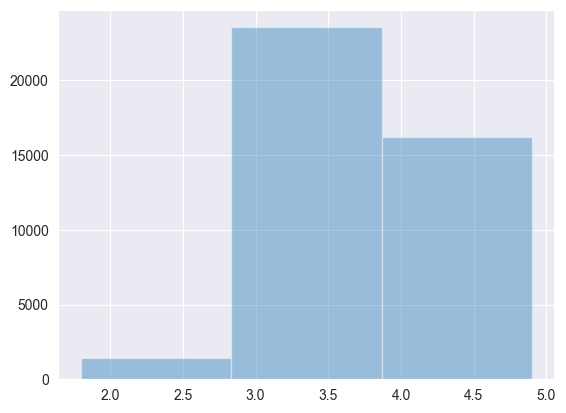

In [106]:
sns.distplot(x=df_cleaned['Ratings'], kde=False, bins=3)
plt.show()

Text(0, 0.5, 'Ratings Count')

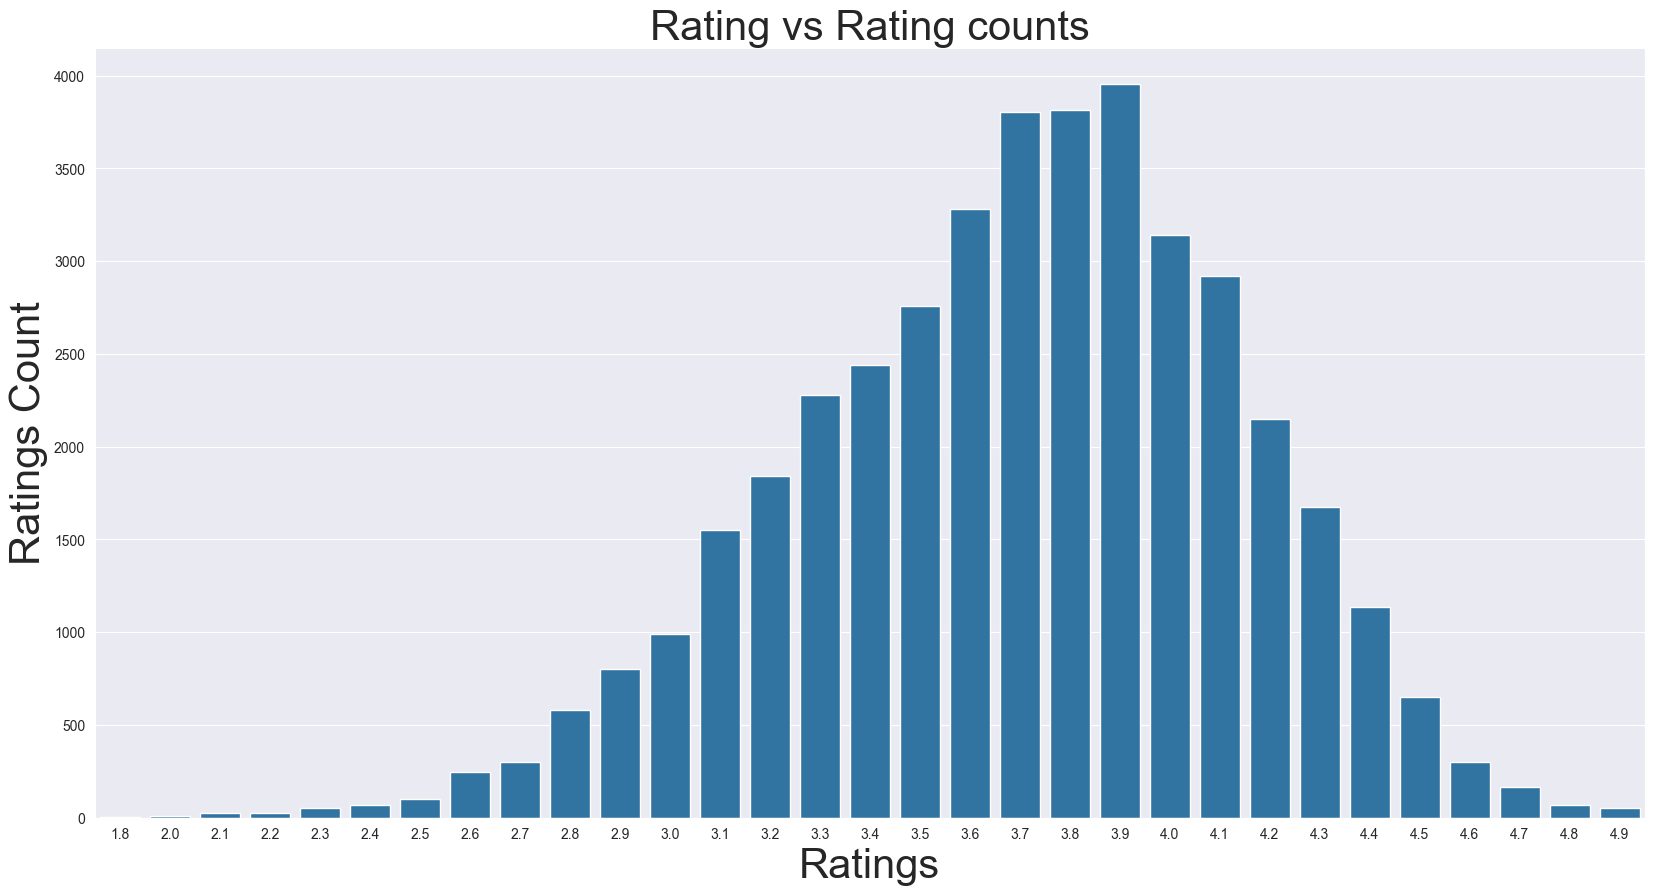

In [107]:
ratings=df_cleaned.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(20,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.

* Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?

[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 3000x1000 with 0 Axes>

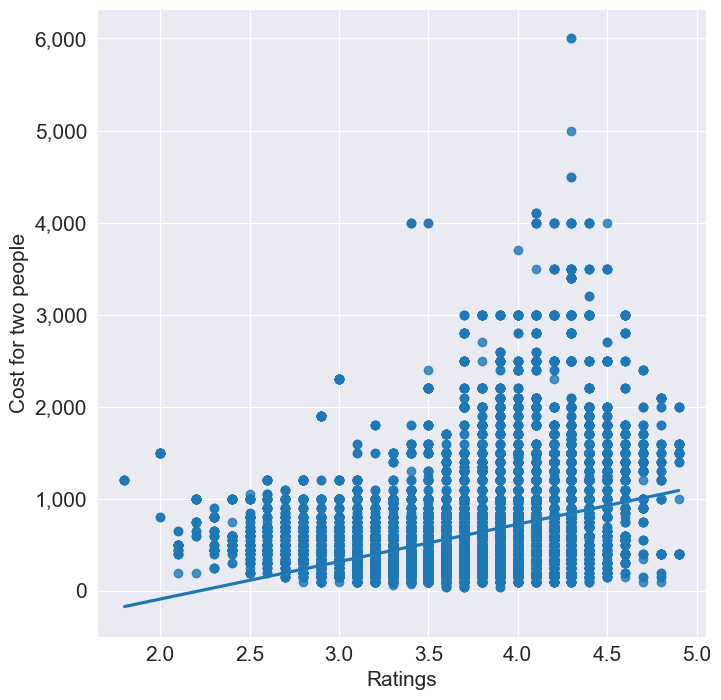

In [108]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost_for_2',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

As we can see, restaurants that cost less have better reviews than restaurants that are expensive.

* Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.

In [109]:
a=df.groupby('Location')['Ratings'].mean().reset_index().sort_values(by='Ratings', ascending=False)
print(a.head())

          Location   Ratings
7    Church Street  3.801338
5     Brigade Road  3.800742
21         MG Road  3.799536
27  Residency Road  3.778720
20    Lavelle Road  3.774948


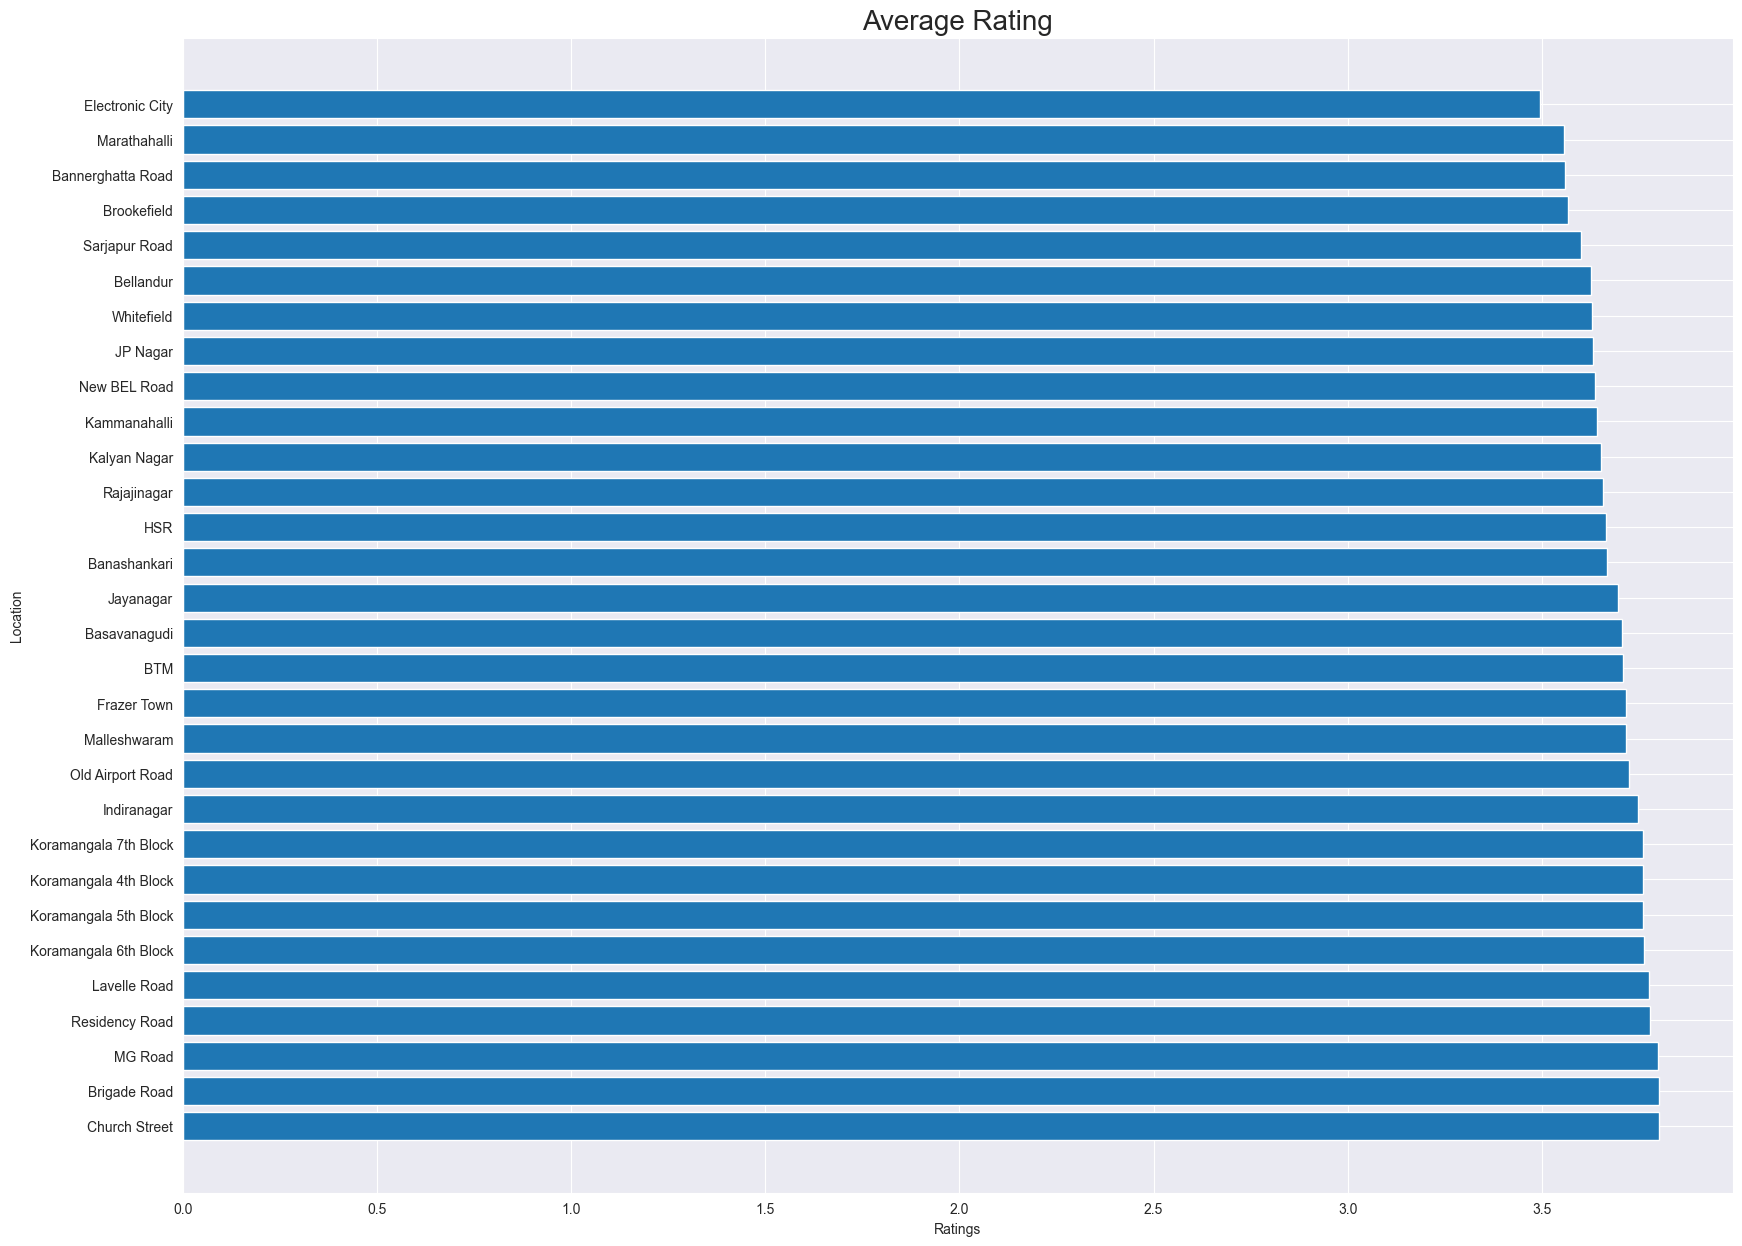

In [110]:
plt.figure(figsize=(20,15))
plt.barh(a.Location, a.Ratings)
plt.xlabel('Ratings', size=10)
plt.ylabel('Location', size=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Rating', size=20)
plt.show()

High-rated restaurants are mainly located in Church Street, Brigade Road, and MG Road, whereas Electronic City has the fewest high-rated restaurants.

* Which cuisine do customers like the most?

The evaluation is based on the assumption that customers tend to give higher ratings to their favorite cuisines

In [111]:
b=df_cleaned.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))

                                               Cuisines  Ratings
1001  continental, north indian, italian, south indi...      4.9
1274                 healthy food, salad, mediterranean      4.9
172                         asian, chinese, thai, momos      4.9
989   continental, north indian, chinese, european, ...      4.8
192             asian, mediterranean, north indian, bbq      4.8


* What is the average price for two people based on the type of service?

In [112]:
d=df_cleaned.groupby('Type')['Cost_for_2'].mean().reset_index().sort_values(by='Cost_for_2')
print(d)

                 Type   Cost_for_2
3            Desserts   409.114064
2            Delivery   495.197237
1               Cafes   646.426208
4            Dine-out   655.074011
0              Buffet  1316.548463
6       Pubs and bars  1336.031746
5  Drinks & nightlife  1454.190751


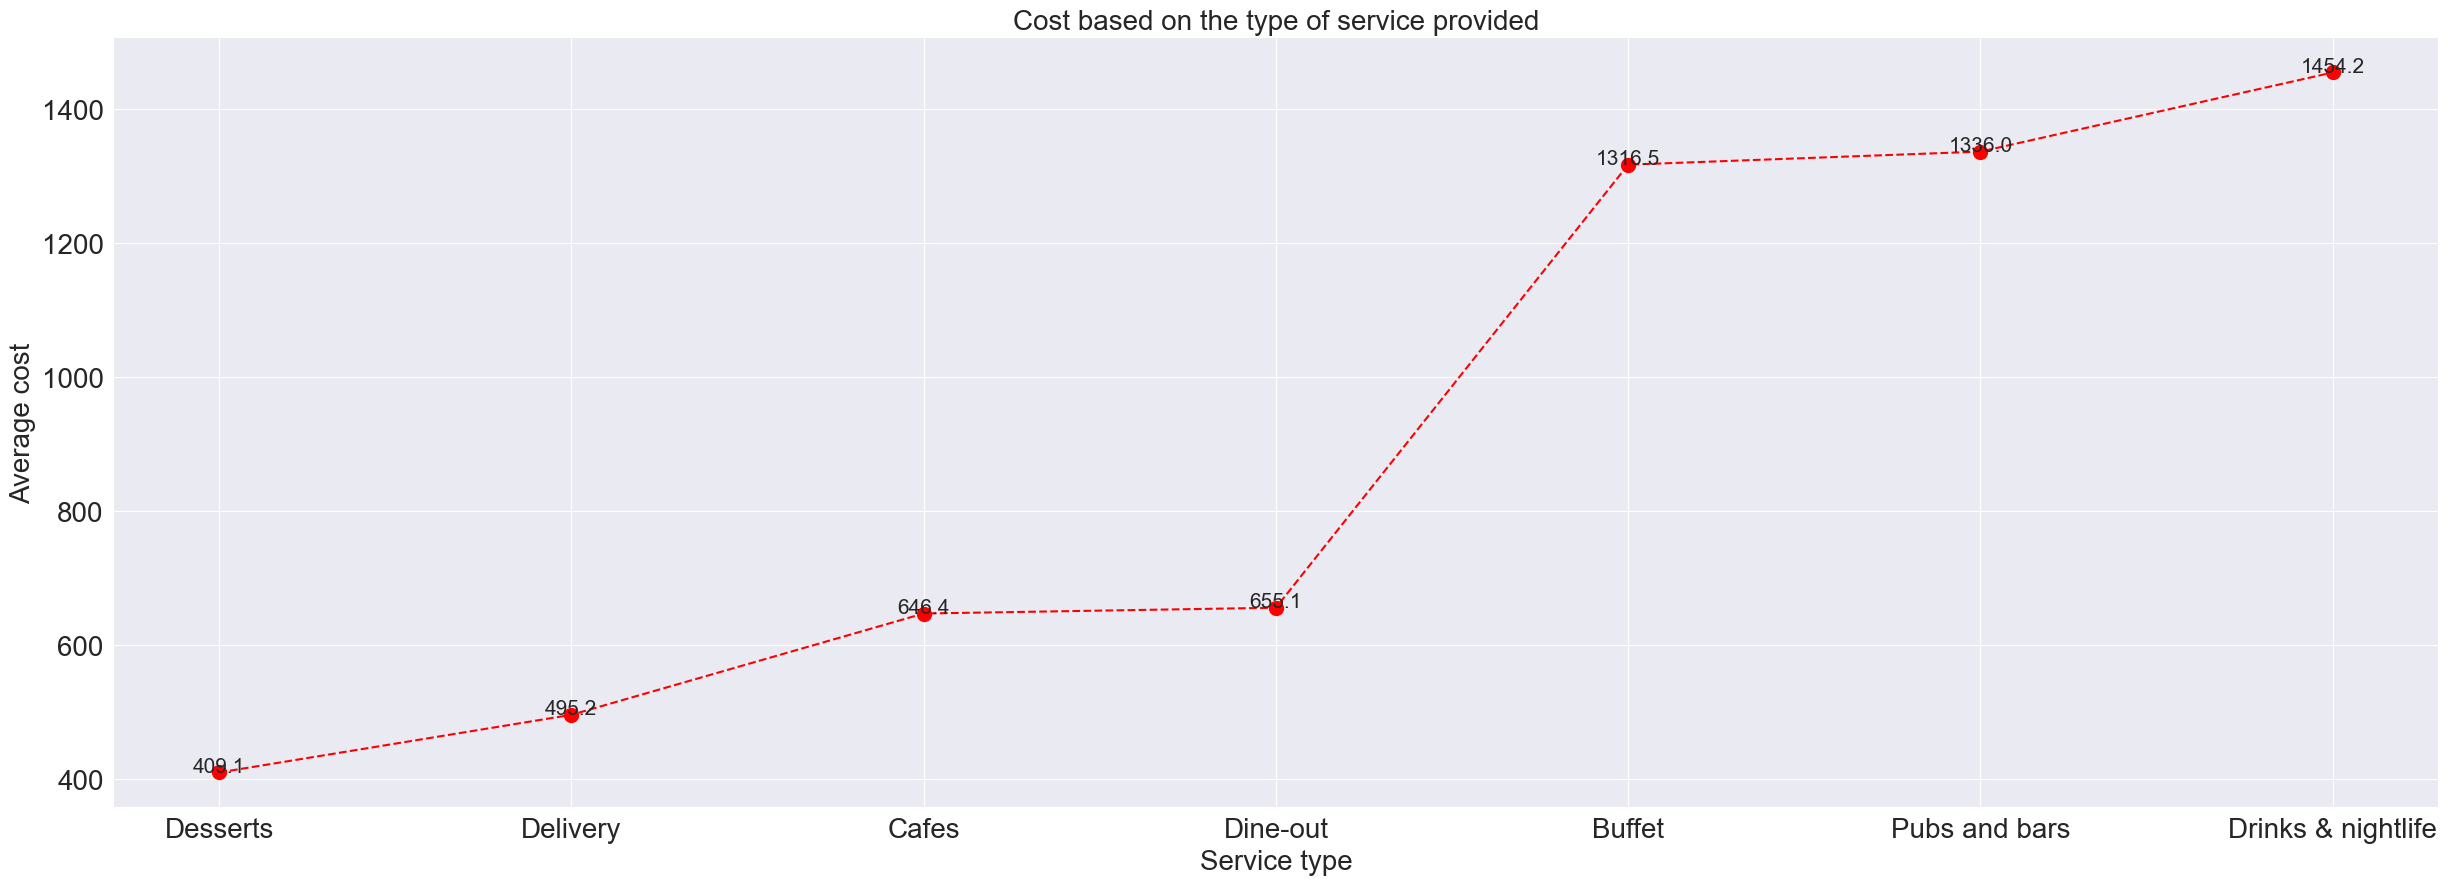

In [113]:
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost_for_2'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost_for_2):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

Based on the line graph, desserts were the cheapest food option, whereas restaurants offering buffets and drinks charged over Rs.1300 for two people.

* Does the restaurant’s rating depend on whether it accepts online orders or not?

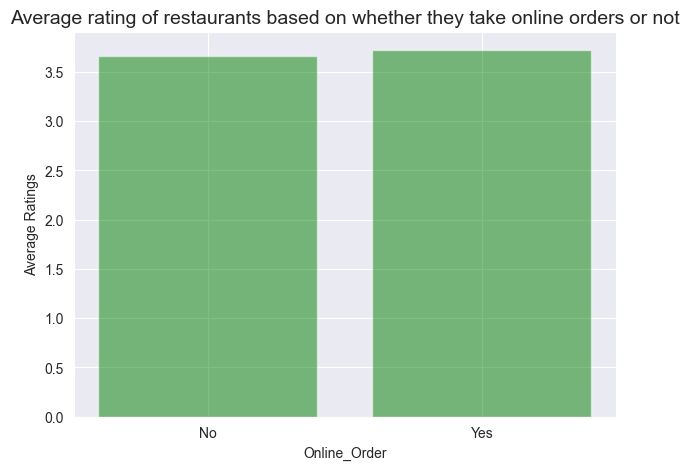

In [114]:
grp1=df_cleaned.groupby('Online_Order')['Ratings'].mean().reset_index()
plt.figure(figsize=(7,5))
plt.bar(grp1['Online_Order'],grp1['Ratings'],alpha=0.5,color='green')
plt.xlabel('Online_Order',size=10)
plt.ylabel('Average Ratings',size=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=14)
plt.show()

Restaurants get similar average ratings from customers, whether they offer online orders or not. This suggests that the ability to take online orders doesn't significantly impact a restaurant's success.

* What are the top 10 highest-rated restaurants?

In [115]:
topRes = df_cleaned.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings', ascending=False)[0:10]
print(topRes)

                                Name   Ratings
943      Byg Brewski Brewing Company  4.900000
4888                Sant Spa Cuisine  4.900000
420   Asia Kitchen By Mainland China  4.900000
4447                    Punjab Grill  4.871429
624           Belgian Waffle Factory  4.844828
5983                The Pizza Bakery  4.800000
1977                        Flechazo  4.800000
4104                 OG Variar  Sons  4.800000
88           ABs  Absolute Barbecues  4.789474
703                       Biergarten  4.766667


In [116]:
# Restaurant Type:

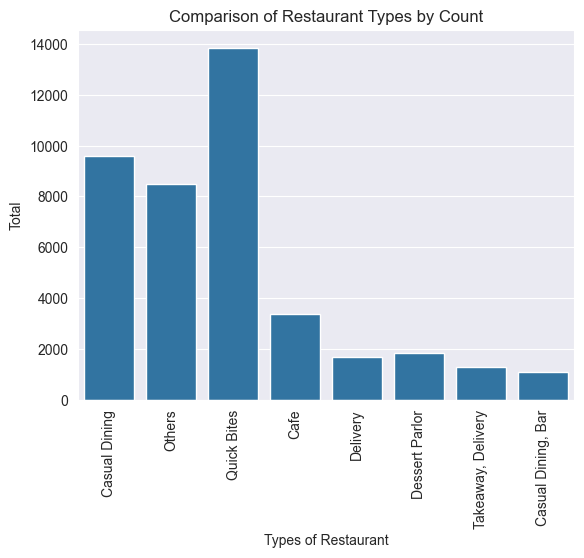

In [117]:
sns.set_style('darkgrid')
sns.countplot(x=df_cleaned['Rest_Type'])
plt.title('Comparison of Restaurant Types by Count')
plt.xlabel('Types of Restaurant')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

In [118]:
df.columns

Index(['Name', 'Online_Order', 'Book_Table', 'Ratings', 'Votes', 'Rest_Type',
       'Cuisines', 'Cost_for_2', 'Type', 'Location', 'Rate_Category'],
      dtype='object')

Text(0.5, 1.0, 'Count of restaurants which allows booking table')

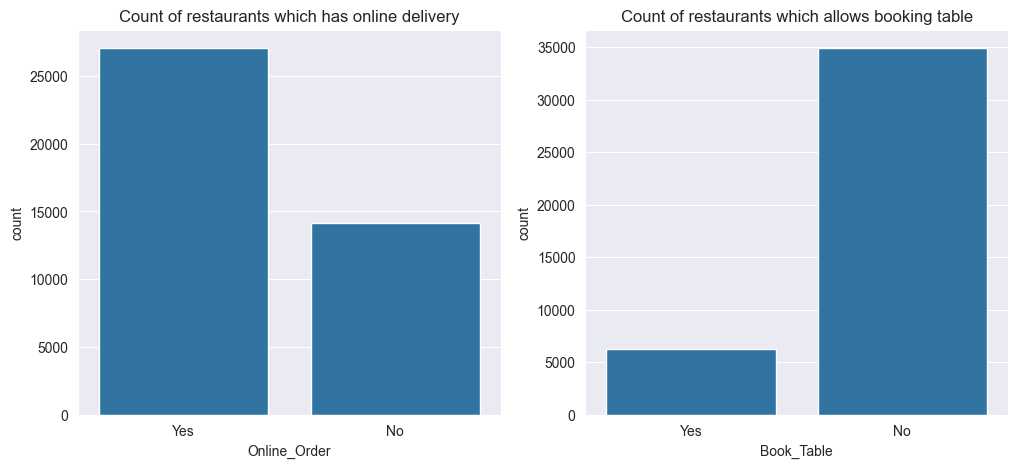

In [119]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df_cleaned['Online_Order'],ax=axes[0])
axes[0].set_title("Count of restaurants which has online delivery")
sns.countplot(x=df_cleaned['Book_Table'],ax=axes[1])
axes[1].set_title("Count of restaurants which allows booking table")

Text(0, 0.5, 'Count of Restaurants')

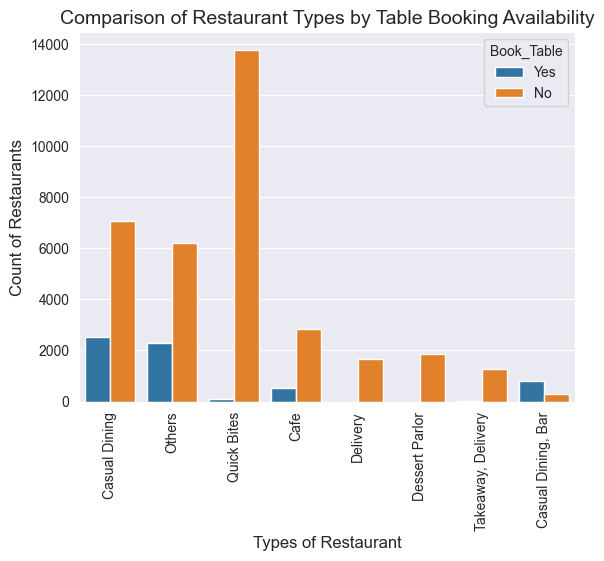

In [120]:
sns.countplot(x=df['Rest_Type'],hue=df['Book_Table'])
plt.xticks(rotation=90)
plt.title('Comparison of Restaurant Types by Table Booking Availability', fontsize=14)
plt.xlabel('Types of Restaurant', fontsize=12)
plt.ylabel('Count of Restaurants', fontsize=12)

In [121]:
df_cleaned.Rate_Category

0          high
1          high
2        medium
3        medium
4        medium
          ...  
41193    medium
41194       low
41195    medium
41196      high
41197    medium
Name: Rate_Category, Length: 41198, dtype: object

In [122]:
## Hypothesis Testing

In [123]:
# Checking if cuisine has an impact on the rating of the restaurant

# H0 : There is no association of rating category on cuisine
# H1 : There is an association of rating category on cuisine

alpha = 0.05
contingency_table=pd.crosstab(df_cleaned['Cuisines'],df_cleaned['Rate_Category'],normalize=True)
stat,pval,dof,feq=scipy.stats.chi2_contingency(contingency_table)

if pval<alpha:
    print(f"{pval} - There is an association of rating category on cuisine")
else:
    print(f"{pval} - There is no association of rating category on cuisine") 

1.0 - There is no association of rating category on cuisine


In [126]:
# !pip freeze > requirements.txt

In [127]:
cd C:\Users\dhane\Desktop\Elevate\Project

C:\Users\dhane\Desktop\Elevate\Project
